<a href="https://colab.research.google.com/github/suelen-prs/-ebac-ciencia-de-dados-modulo-3-parte-2/blob/master/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('demo02.csv')
data

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,1,...,1,0,0,0,0,1,0,0,0,0
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,1,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,1,...,1,1,0,0,0,1,0,0,0,0


In [3]:
new_data = data[['tempo_emprego', 'possui_fone_comercial', 'mau']]
new_data

,tempo_emprego,possui_fone_comercial,mau
0,3.106849,0,0
1,8.358904,0,0
2,8.358904,0,0
3,2.106849,1,0
4,3.021918,0,0
...,...,...,...
16645,9.884932,0,1
16646,7.380822,1,1
16647,9.800000,1,1
16648,9.800000,1,1


In [4]:
y = new_data.mau
X = new_data.drop('mau', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


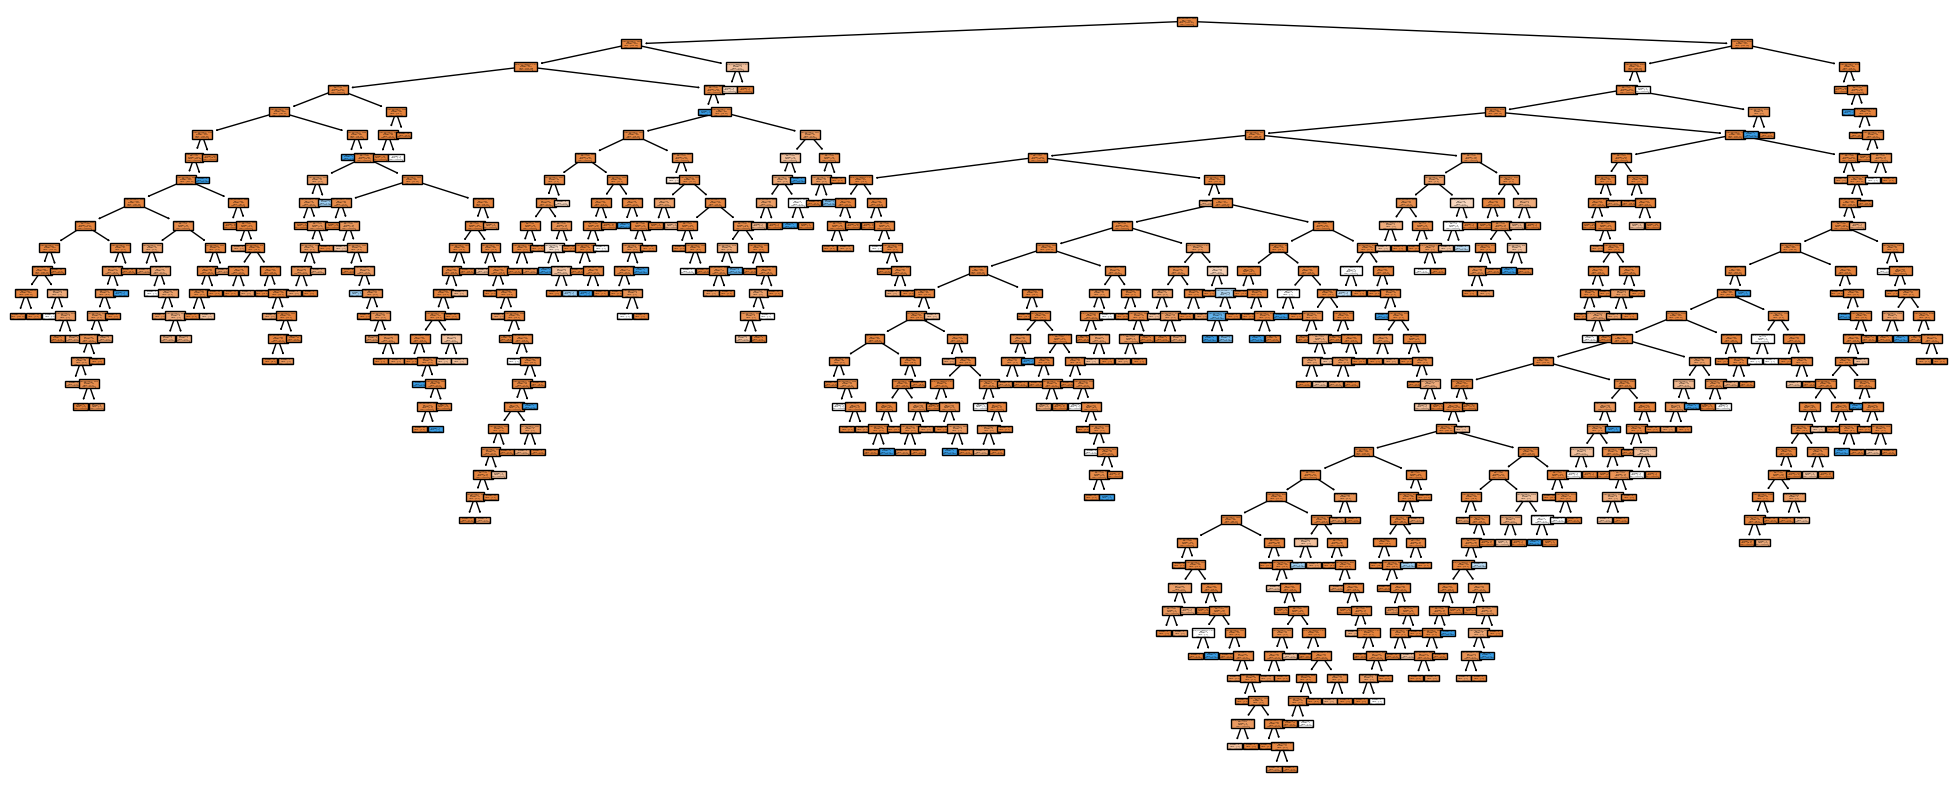

In [7]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados	', 'reprovados'],
          feature_names=X.columns);

In [17]:
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


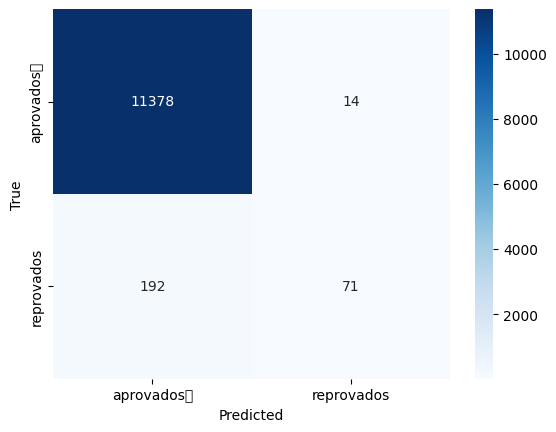

In [18]:
labels = ['aprovados	', 'reprovados']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {accuracy:.2f}")

Acurácia na base de treinamento: 0.98


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [16]:
clf_test = DecisionTreeClassifier(random_state=123)
clf_test = clf.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


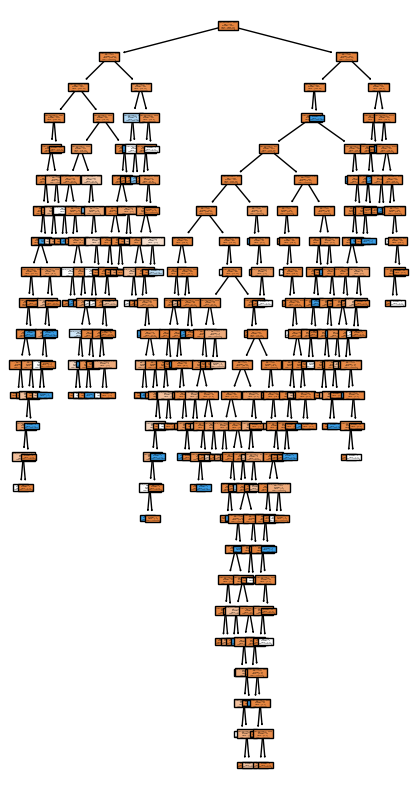

In [17]:
plt.figure(figsize=(5, 10))
plot_tree(clf_test,
          filled=True,
          class_names=['aprovados	', 'reprovados'],
          feature_names=X.columns);

In [11]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


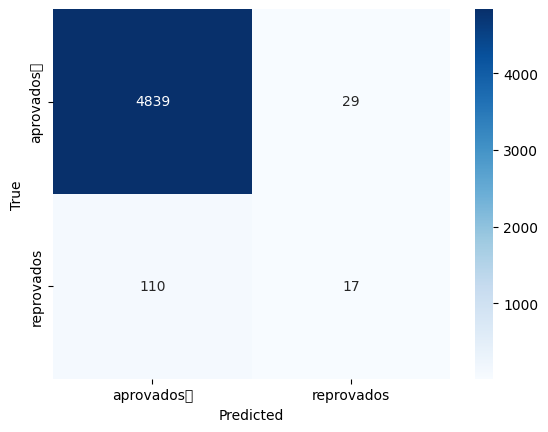

In [19]:
labels = ['aprovados	', 'reprovados']
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
y_pred_train = clf.predict(X_test)
accuracy_train = accuracy_score(y_test, y_pred_train)
print(f"Acurácia na base de teste: {accuracy_train:.2f}")

Acurácia na base de teste: 0.99
